In [3]:
import cv2 # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include channel dimension (1 for grayscale images)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize the data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 2: Build the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Step 3: Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Capture the training history
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)



c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.6889 - loss: 0.9133 - val_accuracy: 0.9701 - val_loss: 0.0979
Epoch 2/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9474 - loss: 0.1798 - val_accuracy: 0.9762 - val_loss: 0.0734
Epoch 3/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9587 - loss: 0.1418 - val_accuracy: 0.9807 - val_loss: 0.0644
Epoch 4/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9670 - loss: 0.1137 - val_accuracy: 0.9837 - val_loss: 0.0531
Epoch 5/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9710 - loss: 0.0984 - val_accuracy: 0.9868 - val_loss: 0.0471
Epoch 6/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9738 - loss: 0.0876 - val_accuracy: 0.9878 - val_loss: 0.0439
Epoch 7/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9762 - loss: 0.0815 - val_accuracy: 0.9858 - val_loss: 0.0456
Epoch 8/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9785 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit: 2


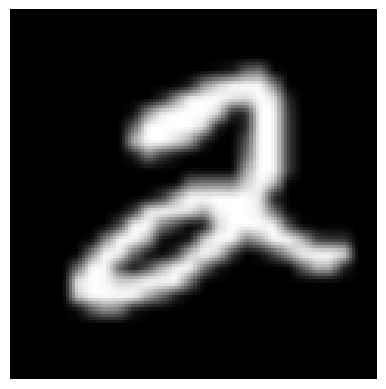

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 4


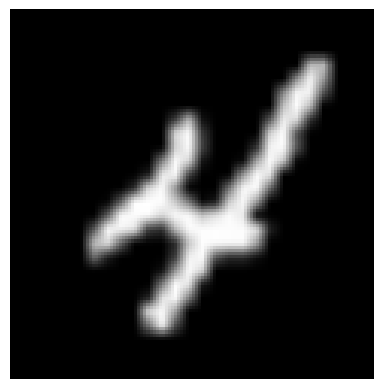

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 6


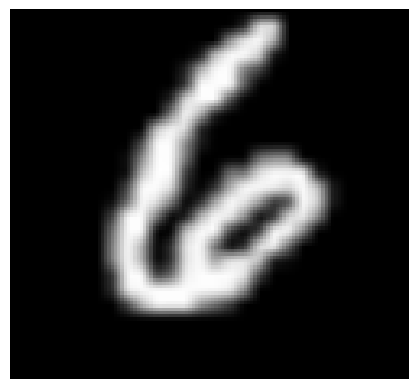

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 7


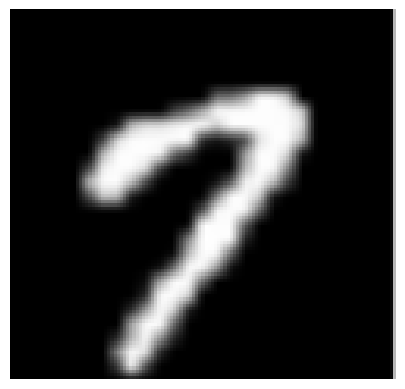

In [69]:
# Step 4: Load, preprocess, and predict the images
image_paths = [r'C:\Users\ravi\Desktop\2pic.png',r'C:\Users\ravi\Desktop\4pic.png',r'C:\Users\ravi\Desktop\6pic.png',r'C:\Users\ravi\Desktop\7pic.png']
for image_path in image_paths:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f'Error loading image: {image_path}')
        continue
    img_resized = cv2.resize(img, (28, 28))
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)

    prediction = model.predict(img_reshaped)
    predicted_class = np.argmax(prediction, axis=1)
    print(f'Predicted Digit: {predicted_class[0]}')
    
    # Display the image and prediction
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()


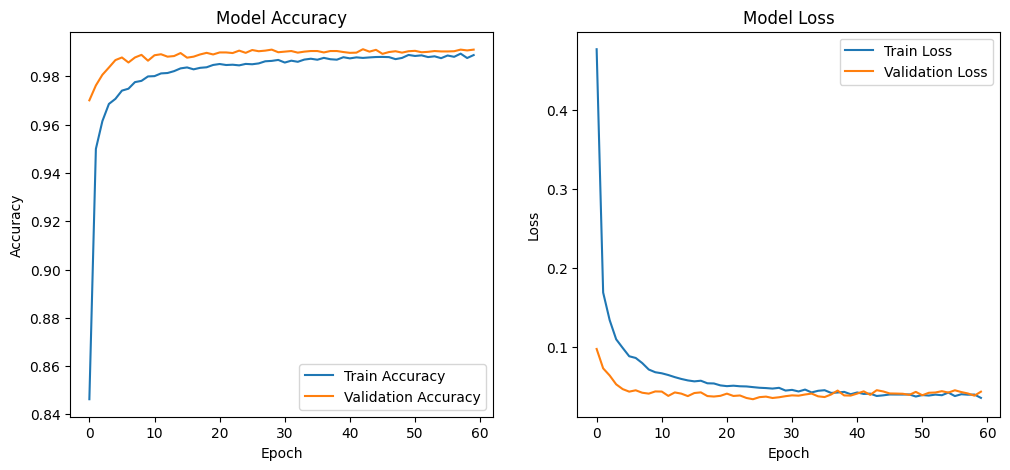

In [4]:
# Step 5: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [71]:

image_paths = r"C:\Users\ravi\Desktop\2pic.png"
img = cv2.imread(image_paths, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_normalized = img_resized / 255.0
img_reshaped = img_normalized.reshape(1, 28, 28, 1)
prediction = model.predict(img_reshaped)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Digit: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted Digit: [2]
